In [1]:
# Importing essential libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Loading the data
path = 'data/full_nigeria_crop_yield_data.csv'
df = pd.read_csv(path)

In [3]:
df.head()

,Crop,State,Market,Area,Production,Yield,Milled Production,Rough Production
0,Corn,Kaduna,2015/2016,"6,771","10,562",1.56,NaN,NaN
1,Corn,Kaduna,2016/2017,"7,312","11,548",1.58,NaN,NaN
2,Corn,Kaduna,2017/2018,"6,389","10,632",1.66,NaN,NaN
3,Corn,Kaduna,2018/2019,"6,541","10,934",1.67,NaN,NaN
4,Corn,Kaduna,2019/2020,"6,543","12,599",1.93,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Crop               675 non-null    object
 1   State              675 non-null    object
 2   Market             675 non-null    object
 3   Area               675 non-null    object
 4   Production         600 non-null    object
 5   Yield              675 non-null    object
 6   Milled Production  75 non-null     object
 7   Rough Production   75 non-null     object
dtypes: object(8)
memory usage: 42.3+ KB


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Crop               675 non-null    object
 1   State              675 non-null    object
 2   Market             675 non-null    object
 3   Area               675 non-null    object
 4   Production         600 non-null    object
 5   Yield              675 non-null    object
 6   Milled Production  75 non-null     object
 7   Rough Production   75 non-null     object
dtypes: object(8)
memory usage: 42.3+ KB


# Data Cleaning

In [6]:
df["Market"].value_counts()

Market
2015/2016                                 45
2016/2017                                 45
2017/2018                                 45
2018/2019                                 45
2019/2020                                 45
2020/2021                                 45
2021/2022                                 45
2022/2023                                 45
2023/2024                                 45
2024/2025                                 45
2025/2026                                 45
5-year Average 2020/21 - 2024/25          45
Percent Change From 5 Year Average (%)    45
Record                                    45
Record Year                               45
Name: count, dtype: int64

In [7]:
# Values to remove
unwanted_values = [
    "Record Year",
    "Record",
    "Percent Change From 5 Year Average (%)",
    "5-year Average 2020/21 - 2024/25"
]

# Drop rows where 'Market' column contains any of the unwanted values
df = df[~df['Market'].isin(unwanted_values)]

# Optional: reset index after dropping
df.reset_index(drop=True, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Crop               495 non-null    object
 1   State              495 non-null    object
 2   Market             495 non-null    object
 3   Area               495 non-null    object
 4   Production         440 non-null    object
 5   Yield              495 non-null    object
 6   Milled Production  55 non-null     object
 7   Rough Production   55 non-null     object
dtypes: object(8)
memory usage: 31.1+ KB


In [9]:
# Convert 'Production' column to NaN where it's empty or invalid
df['Production'] = df['Production'].replace('', np.nan)

# For rows where Crop is "Rice" and Production is missing, use Milled Production
df.loc[(df['Crop'] == 'Rice') & (df['Production'].isna()), 'Production'] = df['Milled Production']

In [10]:
df.drop(['Milled Production', 'Rough Production'], axis=1, inplace=True)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Crop        495 non-null    object
 1   State       495 non-null    object
 2   Market      495 non-null    object
 3   Area        495 non-null    object
 4   Production  495 non-null    object
 5   Yield       495 non-null    object
dtypes: object(6)
memory usage: 23.3+ KB


In [12]:
df.head(10)

,Crop,State,Market,Area,Production,Yield
0,Corn,Kaduna,2015/2016,"6,771","10,562",1.56
1,Corn,Kaduna,2016/2017,"7,312","11,548",1.58
2,Corn,Kaduna,2017/2018,"6,389","10,632",1.66
3,Corn,Kaduna,2018/2019,"6,541","10,934",1.67
4,Corn,Kaduna,2019/2020,"6,543","12,599",1.93
5,Corn,Kaduna,2020/2021,"6,049","12,400",2.05
6,Corn,Kaduna,2021/2022,"6,205","12,745",2.05
7,Corn,Kaduna,2022/2023,"5,800","12,949",2.23
8,Corn,Kaduna,2023/2024,"5,700","11,053",1.94
9,Corn,Kaduna,2024/2025,"5,500","11,200",2.04


In [13]:
# Extract the first year
df['Year'] = df['Market'].str.extract(r'(\d{4})')

# Convert to datetime (e.g., 2015 => 2015-01-01)
df['Year'] = pd.to_datetime(df['Year']).dt.year
df.drop('Market', axis = 1, inplace=True)

In [14]:
cols_to_convert = ['Area', 'Production', 'Yield'] 

for col in cols_to_convert:
    df[col] = df[col].str.replace(',', '', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Crop        495 non-null    object 
 1   State       495 non-null    object 
 2   Area        495 non-null    int64  
 3   Production  495 non-null    int64  
 4   Yield       495 non-null    float64
 5   Year        495 non-null    int32  
dtypes: float64(1), int32(1), int64(2), object(2)
memory usage: 21.4+ KB


In [16]:
df.head() 

,Crop,State,Area,Production,Yield,Year
0,Corn,Kaduna,6771,10562,1.56,2015
1,Corn,Kaduna,7312,11548,1.58,2016
2,Corn,Kaduna,6389,10632,1.66,2017
3,Corn,Kaduna,6541,10934,1.67,2018
4,Corn,Kaduna,6543,12599,1.93,2019


In [17]:
df['Crop'].unique() 

array(['Corn', 'Millet', 'Palm Oil', 'Peanut', 'Soybean', 'Rice',
       'Sorghum', 'Wheat'], dtype=object)

In [18]:
df['State'].unique()

array(['Kaduna', 'Niger', 'Borno', 'Plateau', 'Taraba',
       'Primary ~80% Production', 'Yobe', 'Sokoto', 'Adamawa', 'Katsina',
       'Akwa Ibom', 'Imo', 'Delta', 'Cross River', 'Ondo', 'Bauchi',
       'Benue', 'Kano', 'Kwara', 'Nasarawa', 'Jigawa'], dtype=object)

In [19]:
unwanted_value = ['Primary ~80% Production']

df = df[~df['State'].isin(unwanted_value)]
df.reset_index(drop=True, inplace=True)


In [20]:
df['State'].unique()

array(['Kaduna', 'Niger', 'Borno', 'Plateau', 'Taraba', 'Yobe', 'Sokoto',
       'Adamawa', 'Katsina', 'Akwa Ibom', 'Imo', 'Delta', 'Cross River',
       'Ondo', 'Bauchi', 'Benue', 'Kano', 'Kwara', 'Nasarawa', 'Jigawa'],
      dtype=object)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Crop        407 non-null    object 
 1   State       407 non-null    object 
 2   Area        407 non-null    int64  
 3   Production  407 non-null    int64  
 4   Yield       407 non-null    float64
 5   Year        407 non-null    int32  
dtypes: float64(1), int32(1), int64(2), object(2)
memory usage: 17.6+ KB


In [22]:
rain = pd.read_csv('data/rainfall.csv')
temp = pd.read_csv('data/temp.csv')

In [23]:
rain_df = pd.merge(df, rain, on='State')
print(rain_df)

      Crop    State  Area  Production  Yield  Year  Rainfall_mm
0     Corn   Kaduna  6771       10562   1.56  2015         1309
1     Corn   Kaduna  7312       11548   1.58  2016         1309
2     Corn   Kaduna  6389       10632   1.66  2017         1309
3     Corn   Kaduna  6541       10934   1.67  2018         1309
4     Corn   Kaduna  6543       12599   1.93  2019         1309
..     ...      ...   ...         ...    ...   ...          ...
402  Wheat  Katsina    80          90   1.13  2021          559
403  Wheat  Katsina   100         110   1.10  2022          559
404  Wheat  Katsina   110         120   1.09  2023          559
405  Wheat  Katsina   110         125   1.14  2024          559
406  Wheat  Katsina   115         130   1.13  2025          559

[407 rows x 7 columns]


In [24]:
data = pd.merge(rain_df, temp, on='State')
print(data)

      Crop    State  Area  Production  Yield  Year  Rainfall_mm  Temperature_C
0     Corn   Kaduna  6771       10562   1.56  2015         1309             29
1     Corn   Kaduna  7312       11548   1.58  2016         1309             29
2     Corn   Kaduna  6389       10632   1.66  2017         1309             29
3     Corn   Kaduna  6541       10934   1.67  2018         1309             29
4     Corn   Kaduna  6543       12599   1.93  2019         1309             29
..     ...      ...   ...         ...    ...   ...          ...            ...
402  Wheat  Katsina    80          90   1.13  2021          559             31
403  Wheat  Katsina   100         110   1.10  2022          559             31
404  Wheat  Katsina   110         120   1.09  2023          559             31
405  Wheat  Katsina   110         125   1.14  2024          559             31
406  Wheat  Katsina   115         130   1.13  2025          559             31

[407 rows x 8 columns]


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Crop           407 non-null    object 
 1   State          407 non-null    object 
 2   Area           407 non-null    int64  
 3   Production     407 non-null    int64  
 4   Yield          407 non-null    float64
 5   Year           407 non-null    int32  
 6   Rainfall_mm    407 non-null    int64  
 7   Temperature_C  407 non-null    int64  
dtypes: float64(1), int32(1), int64(4), object(2)
memory usage: 24.0+ KB


# Explotory Data Analysis

In [26]:
data.head()

,Crop,State,Area,Production,Yield,Year,Rainfall_mm,Temperature_C
0,Corn,Kaduna,6771,10562,1.56,2015,1309,29
1,Corn,Kaduna,7312,11548,1.58,2016,1309,29
2,Corn,Kaduna,6389,10632,1.66,2017,1309,29
3,Corn,Kaduna,6541,10934,1.67,2018,1309,29
4,Corn,Kaduna,6543,12599,1.93,2019,1309,29


<Axes: >

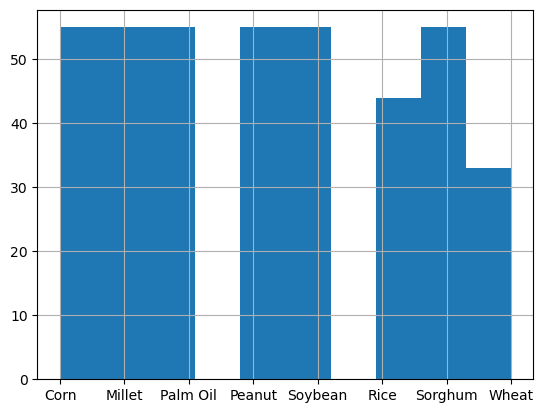

In [27]:
data['Crop'].hist()

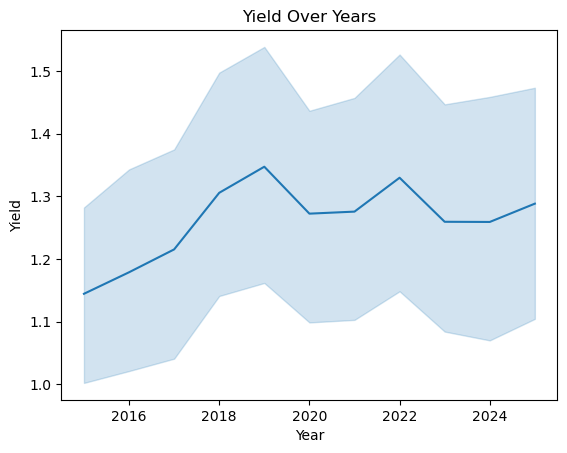

In [28]:
# Yield over years
sns.lineplot(data=data, x='Year', y='Yield')
plt.title("Yield Over Years")
plt.show()

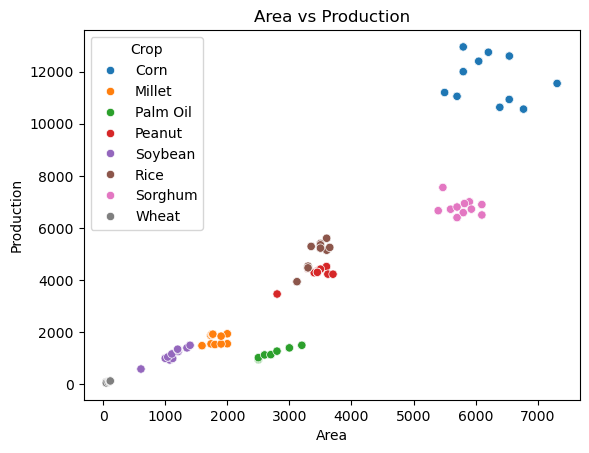

In [29]:
# Area vs. Production
sns.scatterplot(data=data, x='Area', y='Production', hue='Crop')
plt.title("Area vs Production")
plt.show()


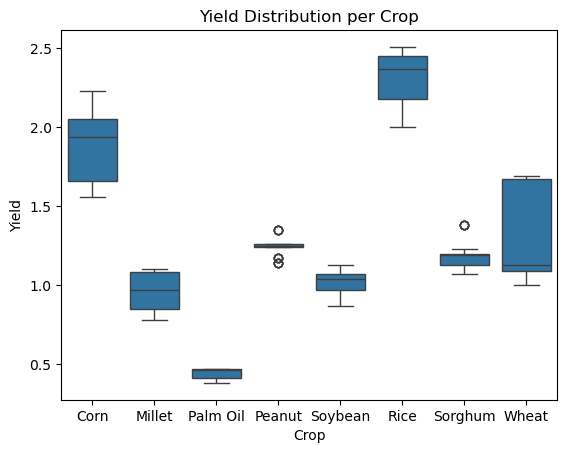

In [30]:
# Yield by Crop
sns.boxplot(data=data, x='Crop', y='Yield')
plt.title("Yield Distribution per Crop")
plt.show()

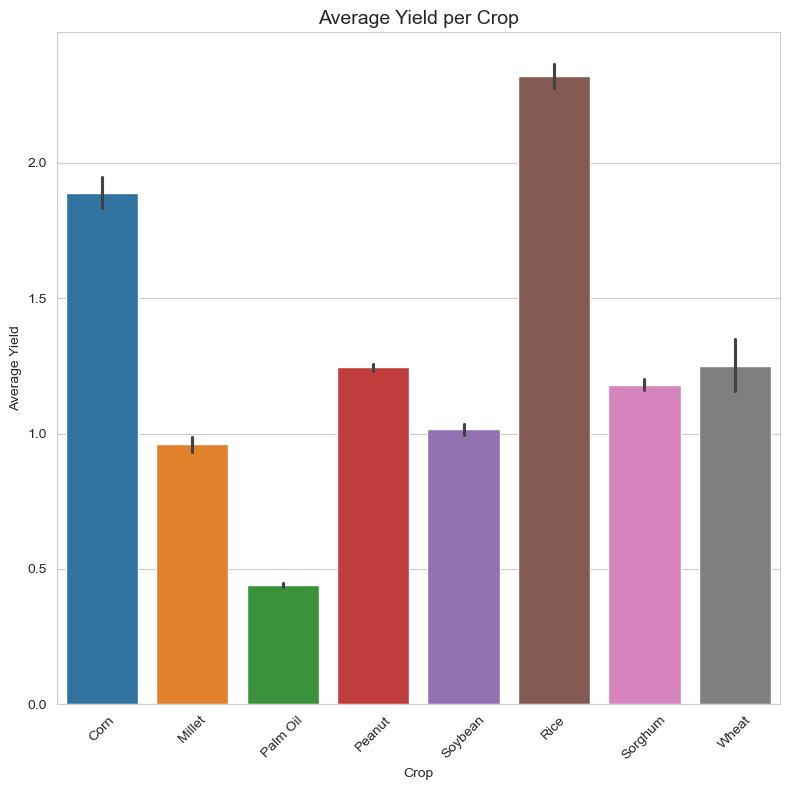

In [31]:
plt.figure(figsize=(8, 8))
sns.set_style("whitegrid")

# Plot average yield per crop
sns.barplot(data=data, x='Crop', y='Yield', estimator='mean', hue='Crop')

plt.title("Average Yield per Crop", fontsize=14)
plt.xlabel("Crop")
plt.ylabel("Average Yield")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

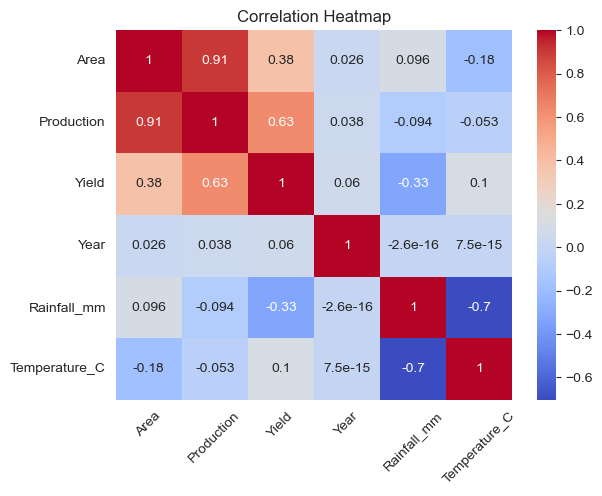

In [32]:
corr = data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.xticks(rotation=45)

plt.show()

In [33]:
data.drop('Production', axis=1, inplace=True)

# Modelling

In [34]:
# importing modelling libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


In [35]:
# Separating features and target variable
X = data.drop(columns=['Yield'])
y = data['Yield']



In [36]:
data.columns

Index(['Crop', 'State', 'Area', 'Yield', 'Year', 'Rainfall_mm',
       'Temperature_C'],
      dtype='object')

In [37]:
# Identifying categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X.select_dtypes(include=['number']).columns.tolist()

# Setting up the column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])



In [38]:
# Creating the RandomForestRegressor model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])



In [39]:
# Splitting the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)



In [40]:
# Training the model
model.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Area', 'Year',
                                                   'Rainfall_mm',
                                                   'Temperature_C']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Crop', 'State'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [41]:
# Making predictions
y_pred = model.predict(X_test)

# Calculating evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

In [42]:
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

R² Score: 0.9983
MAE: 0.0118
RMSE: 0.0217


In [43]:
import joblib

joblib.dump(model, 'crop_yield_model.pkl')


['crop_yield_model.pkl']

In [45]:
X.columns

Index(['Crop', 'State', 'Area', 'Year', 'Rainfall_mm', 'Temperature_C'], dtype='object')